In [129]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

In [130]:
stock_data = pd.read_csv('NASDAQ_MonthlyAverage.csv')
pandemic_data = pd.read_csv('pandemic monthly_forecasted.csv')

In [131]:
stock_data['date'] = pd.to_datetime(stock_data['date'])
pandemic_data['date'] = pd.to_datetime(pandemic_data['date'])

In [132]:
stock_data = stock_data.rename(columns={'date': 'ds', 'price': 'y'})
pandemic_data = pandemic_data.rename(columns={'date': 'ds', 'cases': 'cases'})

In [138]:
train_data = stock_data[stock_data['ds'] < '2022-06-01'] 
test_data = stock_data[(stock_data['ds'] >= '2009-03-01') & (stock_data['ds'] <= '2024-05-01')]

In [139]:
model = Prophet(yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False)
model.add_regressor('cases')
model.fit(train_data.merge(pandemic_data, on='ds'))

21:40:48 - cmdstanpy - INFO - Chain [1] start processing
21:40:49 - cmdstanpy - INFO - Chain [1] done processing


In [140]:
future_dates = pd.date_range(start='2024-06-01', end='2025-05-31', freq='ME')
future = pd.DataFrame({'ds': future_dates})
future.tail()

,ds
7,2025-01-31
8,2025-02-28
9,2025-03-31
10,2025-04-30
11,2025-05-31


In [141]:
future = pd.merge(future, pandemic_data, on='ds', how='left')

future['cases'] = 0

In [142]:
forecast = model.predict(future)

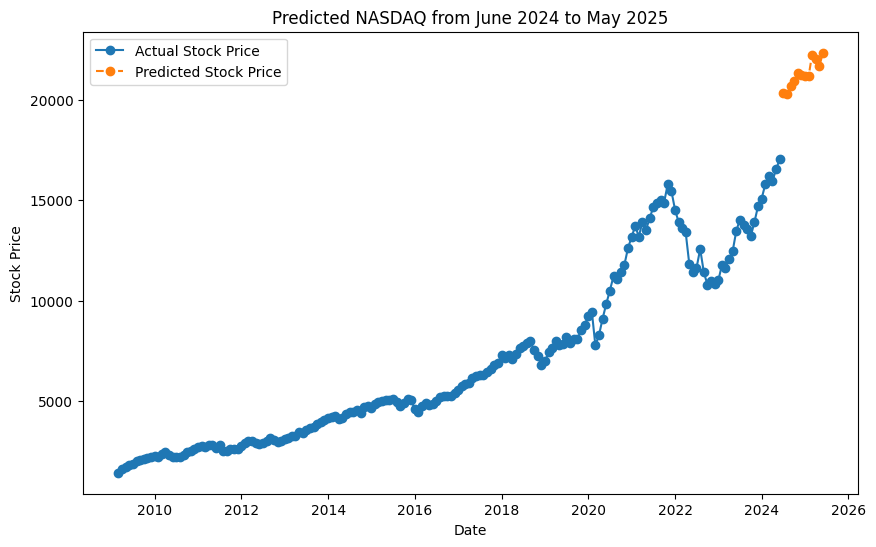

In [145]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(stock_data['ds'], stock_data['y'], label='Actual Stock Price', linestyle='-', marker='o')
ax.plot(forecast['ds'], forecast['yhat'], label='Predicted Stock Price', linestyle='--', marker='o')
ax.set_xlabel('Date')
ax.set_ylabel('Stock Price')
ax.set_title('Predicted NASDAQ from June 2024 to May 2025')
ax.legend()
plt.show()

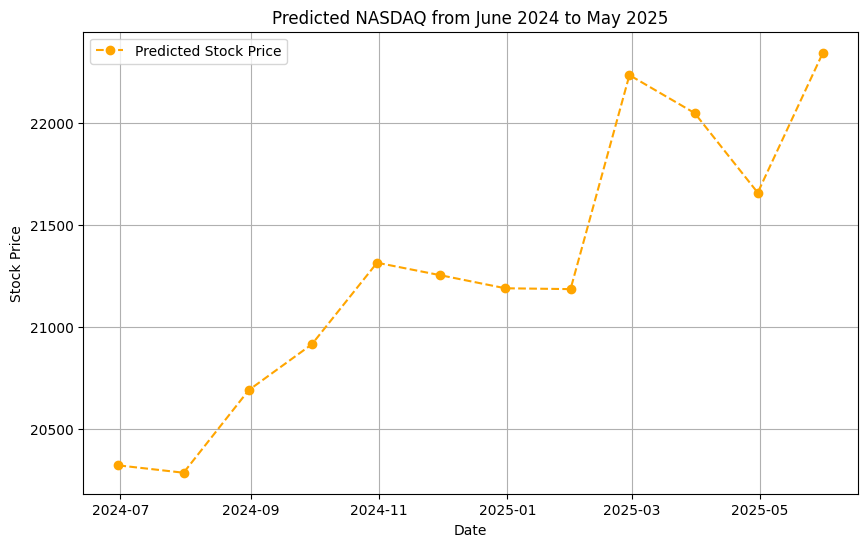

In [146]:
plt.figure(figsize=(10, 6))
plt.plot(forecast['ds'], forecast['yhat'], label='Predicted Stock Price', linestyle='--', marker='o', color='orange')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Predicted NASDAQ from June 2024 to May 2025')
plt.legend()
plt.grid(True)
plt.show()

In [147]:
forecast.to_csv('forecasted_NASDAQ.csv', index=False)